In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset

df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
# fill missing data
df.fillna(df.mean(), inplace=True)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


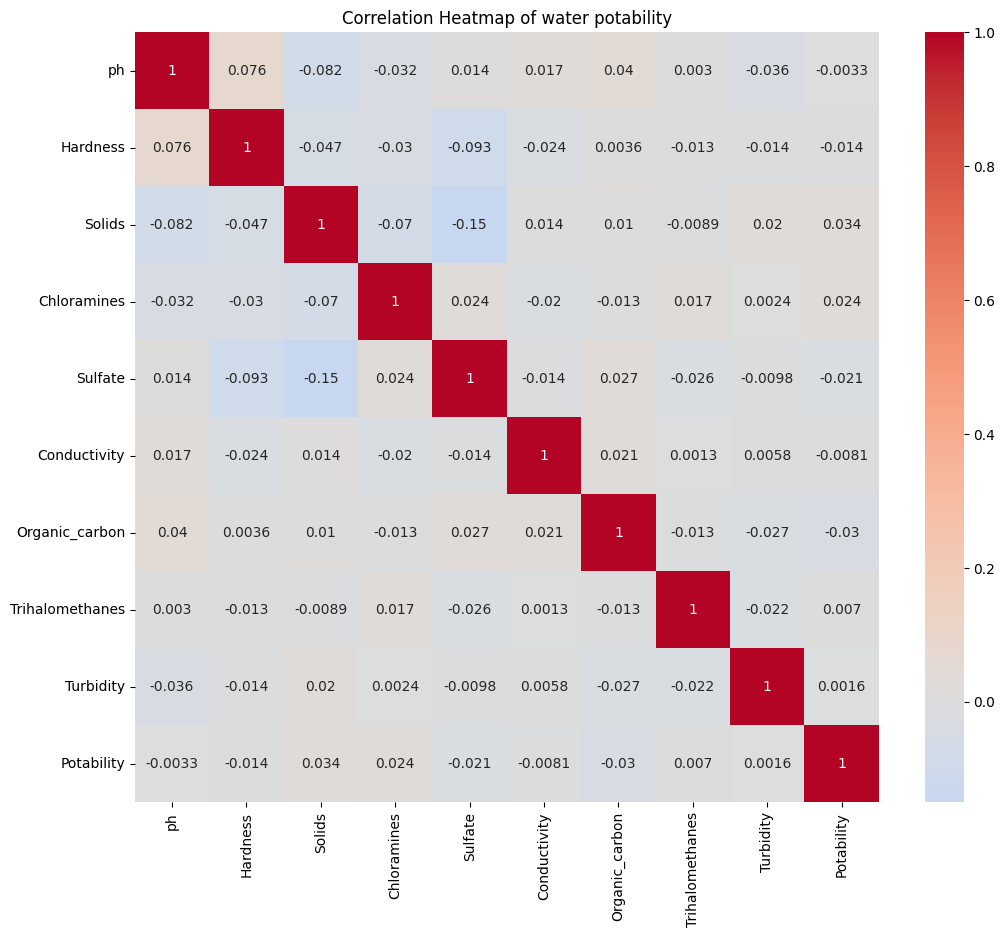

In [4]:
# plot the correlation heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of water potability')
plt.show()


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Splitting the data into train and test
# First split
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split to get validation and test data
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features to normalize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

print('Training data shape:', x_train_scaled.shape)
print('Validation data shape:', x_val_scaled.shape)
print('Test data shape:', x_test_scaled.shape)

Training data shape: (2293, 9)
Validation data shape: (491, 9)
Test data shape: (492, 9)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
def prediction_model():
    model = Sequential()

    # Input layer with L2 regularization
    model.add(Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],), kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.2))

    # Hidden layer with L2 regularization
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer and binary crossentropy loss
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model
    


Epoch 1/1000


c:\Users\HOSA.LTD\water-quality-model\model-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5495 - loss: 0.7542 - val_accuracy: 0.6334 - val_loss: 0.7225
Epoch 2/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6115 - loss: 0.7275 - val_accuracy: 0.6436 - val_loss: 0.7098
Epoch 3/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6219 - loss: 0.7088 - val_accuracy: 0.6436 - val_loss: 0.6974
Epoch 4/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6387 - loss: 0.6962 - val_accuracy: 0.6477 - val_loss: 0.6860
Epoch 5/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6188 - loss: 0.6984 - val_accuracy: 0.6558 - val_loss: 0.6746
Epoch 6/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6499 - loss: 0.6713 - val_accuracy: 0.6517 - val_loss: 0.6642
Epoch 7/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6691 - loss: 0.6594 - val_accuracy: 0.6538 - val_loss: 0.6600
Epoch 8/1000
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6543 - loss: 0.6657 - val_accuracy: 0.6619 - val_l

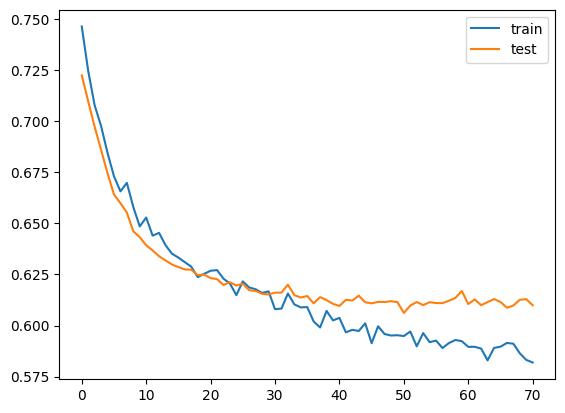

In [30]:
#start training process
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot

model = prediction_model()

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(x_train_scaled, y_train, epochs=1000, batch_size=32, validation_data=(x_val_scaled, y_val), callbacks=[early_stopping])

# evaluate the model
_, train_acc = model.evaluate(x_train_scaled,y_train, verbose=0)
_, test_acc = model.evaluate(x_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [29]:
from sklearn.metrics import classification_report

y_pred = (model.predict(x_test_scaled) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       307
           1       0.66      0.37      0.47       185

    accuracy                           0.69       492
   macro avg       0.68      0.63      0.63       492
weighted avg       0.68      0.69      0.67       492

